In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [7]:
data = pd.read_csv(r"C:\Users\shash\Downloads\12. Seaborn_Batsman.csv")

In [8]:
data.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


In [9]:
data.tail()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
203,140,107,3,Stumped,2,West Indies,2018
204,157,129,3,NO,1,West Indies,2018
205,107,119,3,Bowled,2,West Indies,2018
206,16,17,3,Caught,1,West Indies,2018
207,33,29,3,NO,2,West Indies,2018


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RunsScored       208 non-null    int64 
 1   BallsFaced       208 non-null    int64 
 2   BattingPosition  208 non-null    int64 
 3   Dismissal        208 non-null    object
 4   Inning           208 non-null    int64 
 5   Opposition       208 non-null    object
 6   Year             208 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.5+ KB


In [12]:
data.sample(10)

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
168,122,105,3,Caught,2,England,2017
58,7,18,4,Caught,1,England,2011
87,0,5,3,Bowled,1,Pakistan,2012
24,11,22,3,Stumped,2,Bangladesh,2010
93,26,33,3,Caught,2,England,2013
47,59,76,3,Bowled,1,West Indies,2011
85,128,119,3,NO,2,Sri Lanka,2012
69,23,11,6,NO,1,West Indies,2011
128,1,3,3,NO,2,England,2014
202,71,72,3,Bowled,1,England,2018


In [14]:
data.shape

(208, 7)

In [15]:
data.isnull().sum()

RunsScored         0
BallsFaced         0
BattingPosition    0
Dismissal          0
Inning             0
Opposition         0
Year               0
dtype: int64

In [16]:
data.dtypes

RunsScored          int64
BallsFaced          int64
BattingPosition     int64
Dismissal          object
Inning              int64
Opposition         object
Year                int64
dtype: object

In [20]:
data.duplicated().sum()

0

In [21]:
data.describe()

,RunsScored,BallsFaced,BattingPosition,Inning,Year
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,49.192308,52.961538,3.264423,1.567308,2013.240385
std,43.797641,39.850548,0.781602,0.496644,2.750477
min,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,10.750000,18.000000,3.000000,1.000000,2011.000000
50%,35.000000,46.500000,3.000000,2.000000,2013.000000
75%,81.250000,83.250000,3.000000,2.000000,2015.000000
max,183.000000,159.000000,7.000000,2.000000,2018.000000


In [23]:
data['RunsScored'].min()

0

In [24]:
data['RunsScored'].max()

183

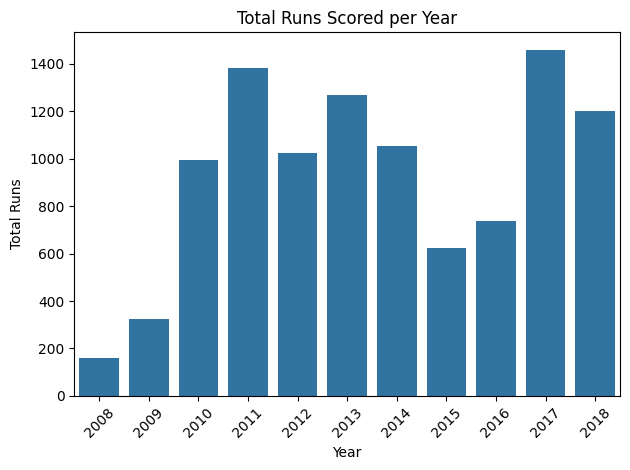

In [28]:
runs_per_year = data.groupby('Year')['RunsScored'].sum().reset_index()
sns.barplot(data=runs_per_year, x='Year', y='RunsScored')
plt.title('Total Runs Scored per Year')
plt.xlabel('Year')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

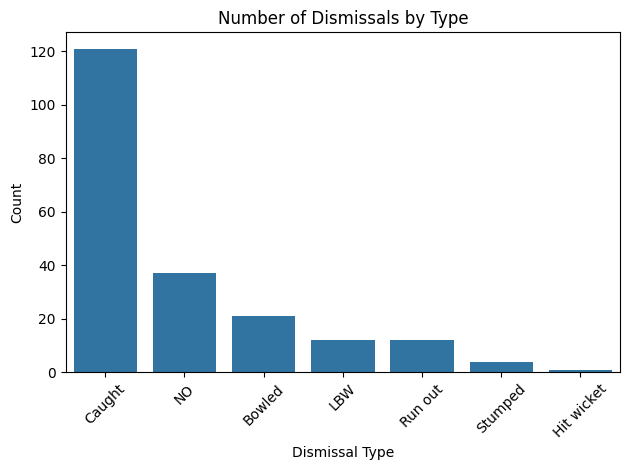

In [30]:
dismissal_counts = data['Dismissal'].value_counts().reset_index()
dismissal_counts.columns = ['Dismissal', 'Count']
sns.barplot(data=dismissal_counts, x='Dismissal', y='Count')
plt.title('Number of Dismissals by Type')
plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

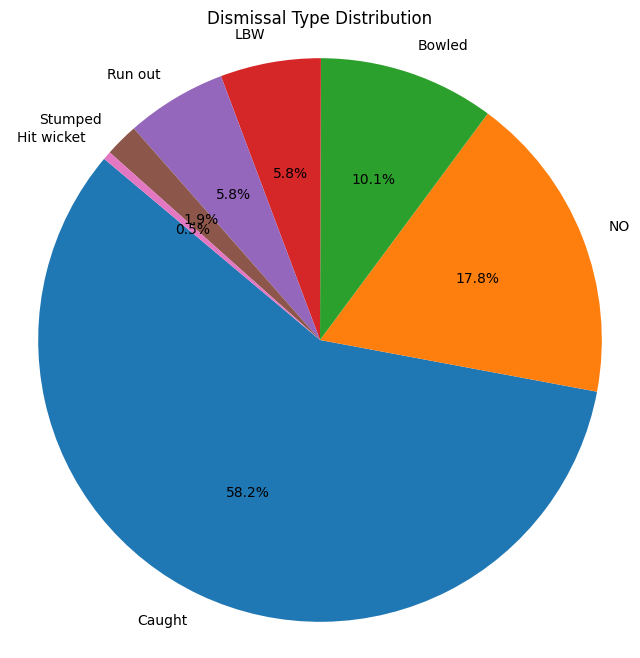

In [31]:
dismissal_counts = data['Dismissal'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(dismissal_counts, labels=dismissal_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Dismissal Type Distribution')
plt.axis('equal')
plt.show()

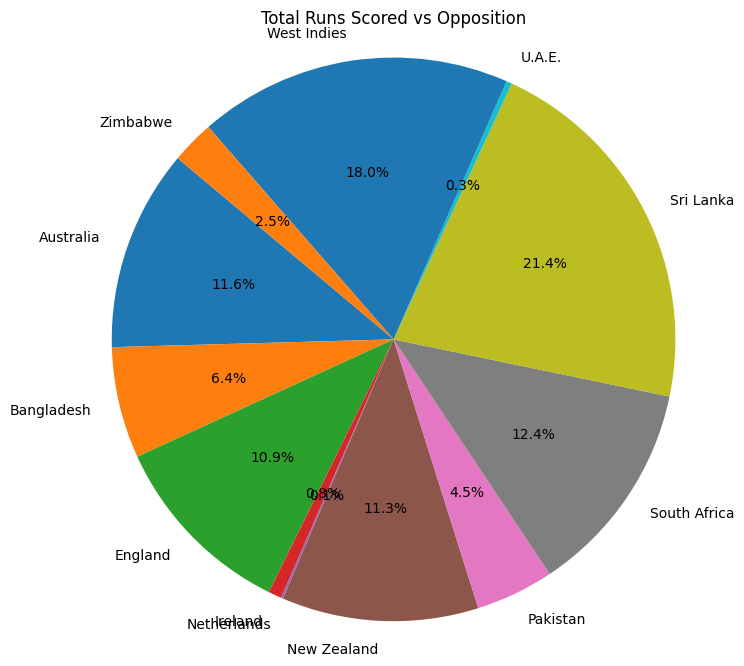

In [32]:
runs_by_opposition = data.groupby('Opposition')['RunsScored'].sum()
plt.figure(figsize=(8, 8))
plt.pie(runs_by_opposition, labels=runs_by_opposition.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Runs Scored vs Opposition')
plt.axis('equal')
plt.show()

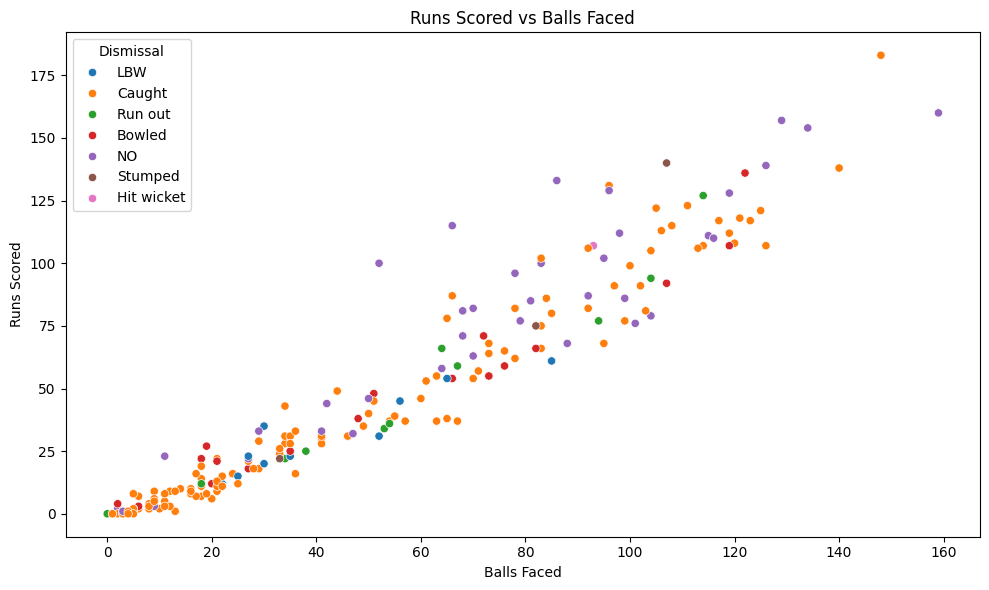

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='BallsFaced', y='RunsScored', hue='Dismissal')
plt.title('Runs Scored vs Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.tight_layout()
plt.show()

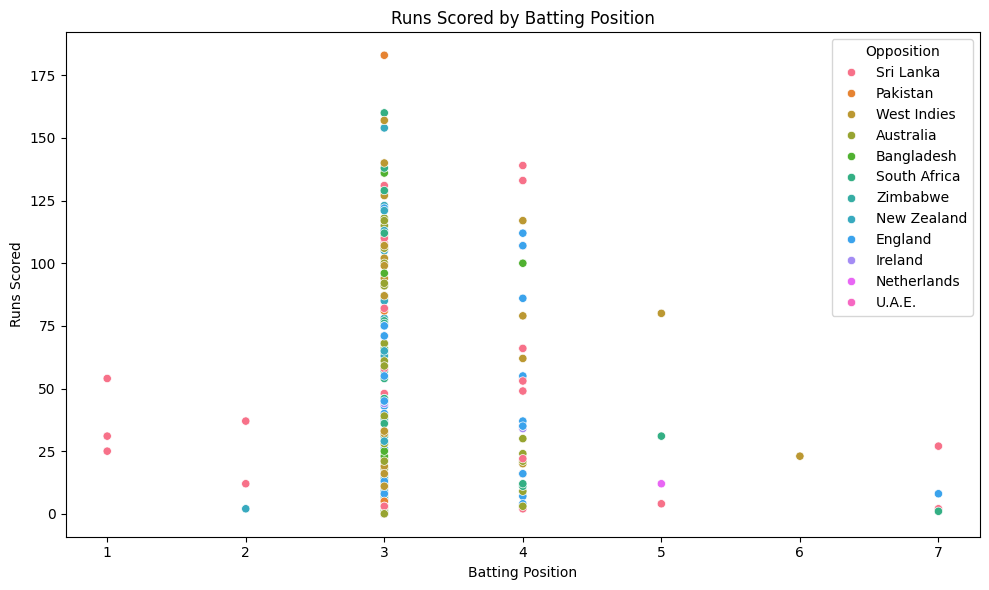

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='BattingPosition', y='RunsScored', hue='Opposition')
plt.title('Runs Scored by Batting Position')
plt.xlabel('Batting Position')
plt.ylabel('Runs Scored')
plt.tight_layout()
plt.show()

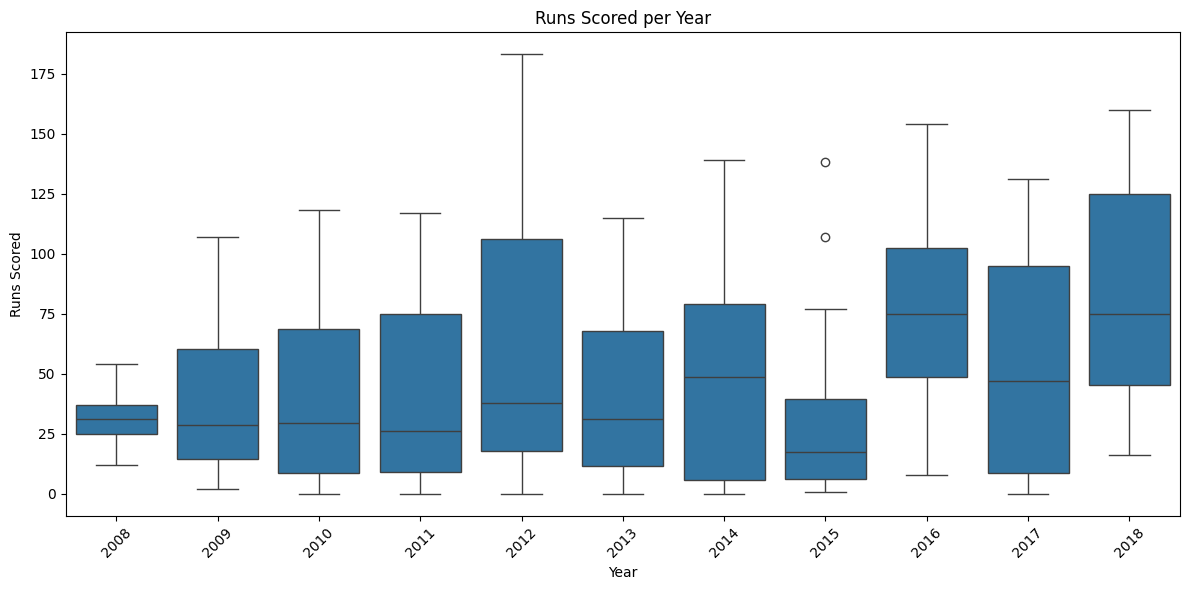

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Year', y='RunsScored')
plt.title('Runs Scored per Year')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

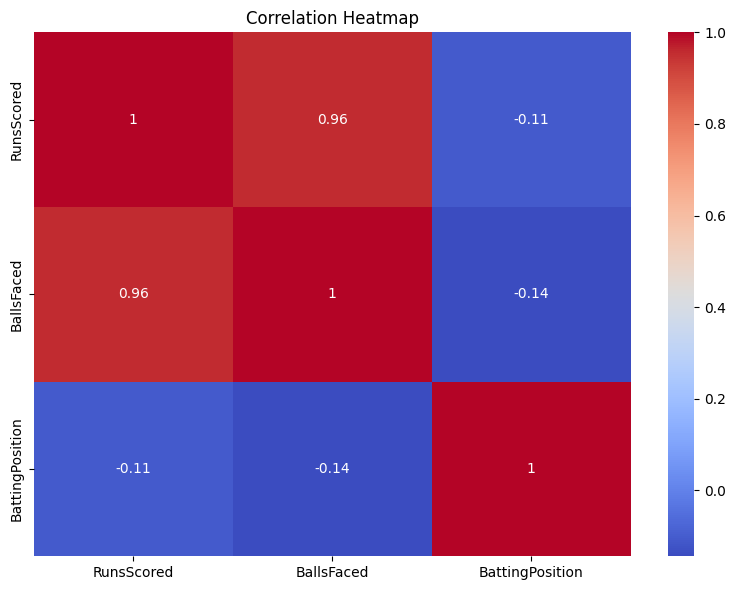

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['RunsScored', 'BallsFaced', 'BattingPosition']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

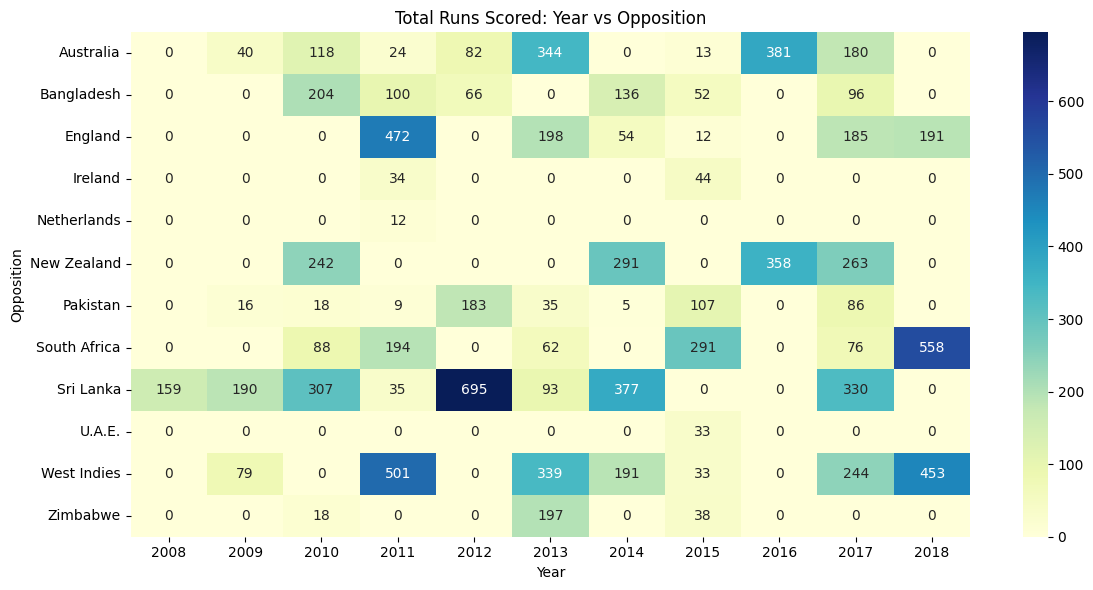

In [38]:
pivot_table = data.pivot_table(values='RunsScored', index='Opposition', columns='Year', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Total Runs Scored: Year vs Opposition')
plt.tight_layout()
plt.show()

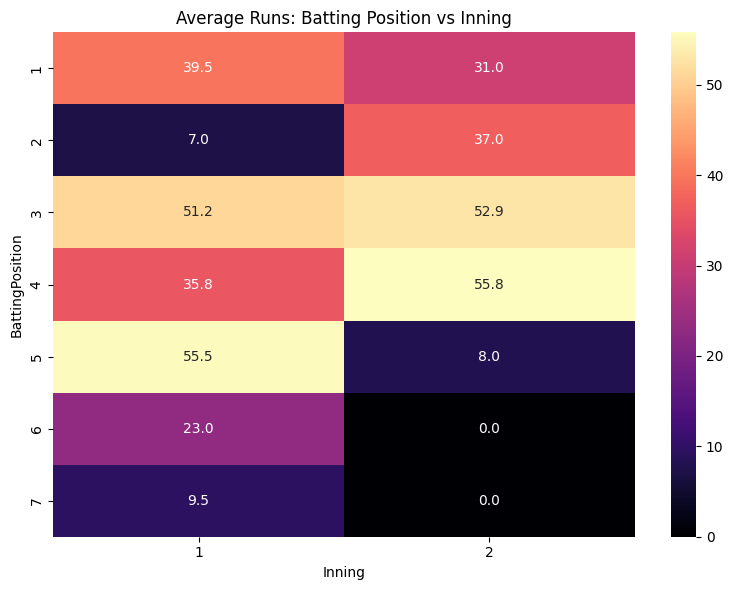

In [39]:
pivot_avg = data.pivot_table(values='RunsScored', index='BattingPosition', columns='Inning', aggfunc='mean', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_avg, annot=True, cmap='magma', fmt='.1f')
plt.title('Average Runs: Batting Position vs Inning')
plt.tight_layout()
plt.show()

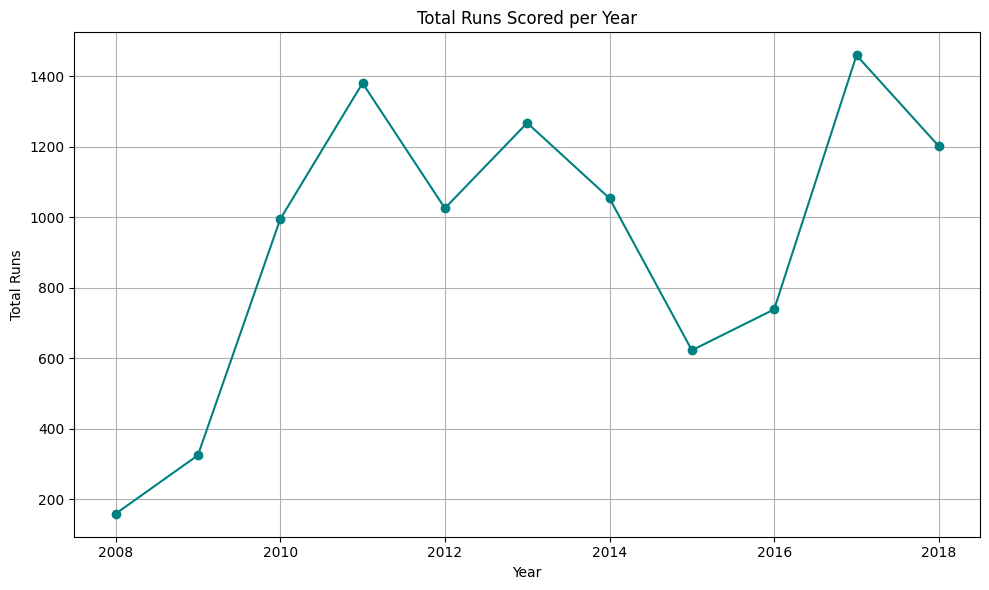

In [40]:
import matplotlib.pyplot as plt
runs_per_year = data.groupby('Year')['RunsScored'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(runs_per_year['Year'], runs_per_year['RunsScored'], marker='o', linestyle='-', color='teal')
plt.title('Total Runs Scored per Year')
plt.xlabel('Year')
plt.ylabel('Total Runs')
plt.grid(True)
plt.tight_layout()
plt.show()

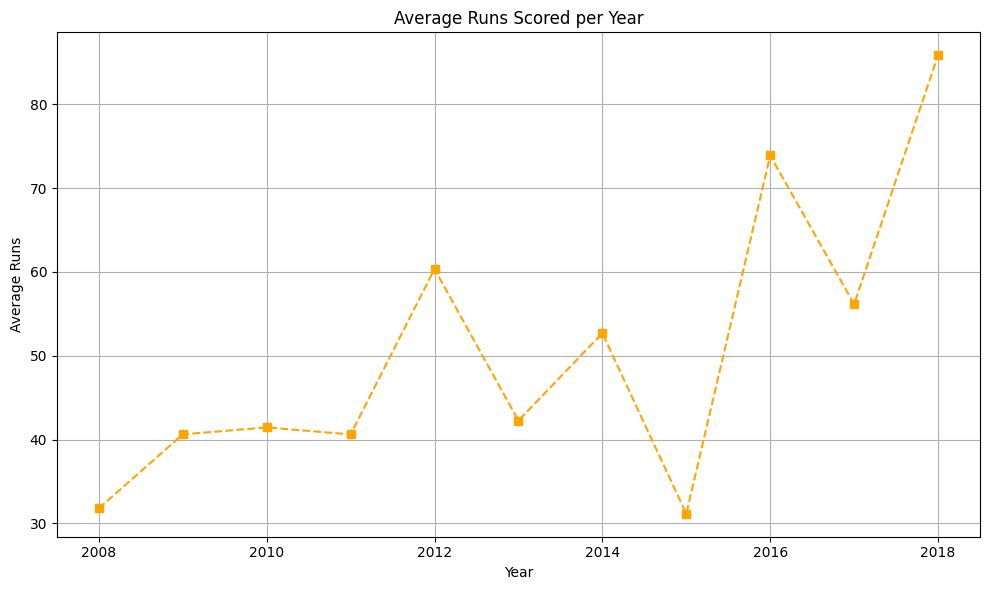

In [41]:
avg_runs_per_year = data.groupby('Year')['RunsScored'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(avg_runs_per_year['Year'], avg_runs_per_year['RunsScored'], marker='s', linestyle='--', color='orange')
plt.title('Average Runs Scored per Year')
plt.xlabel('Year')
plt.ylabel('Average Runs')
plt.grid(True)
plt.tight_layout()
plt.show()

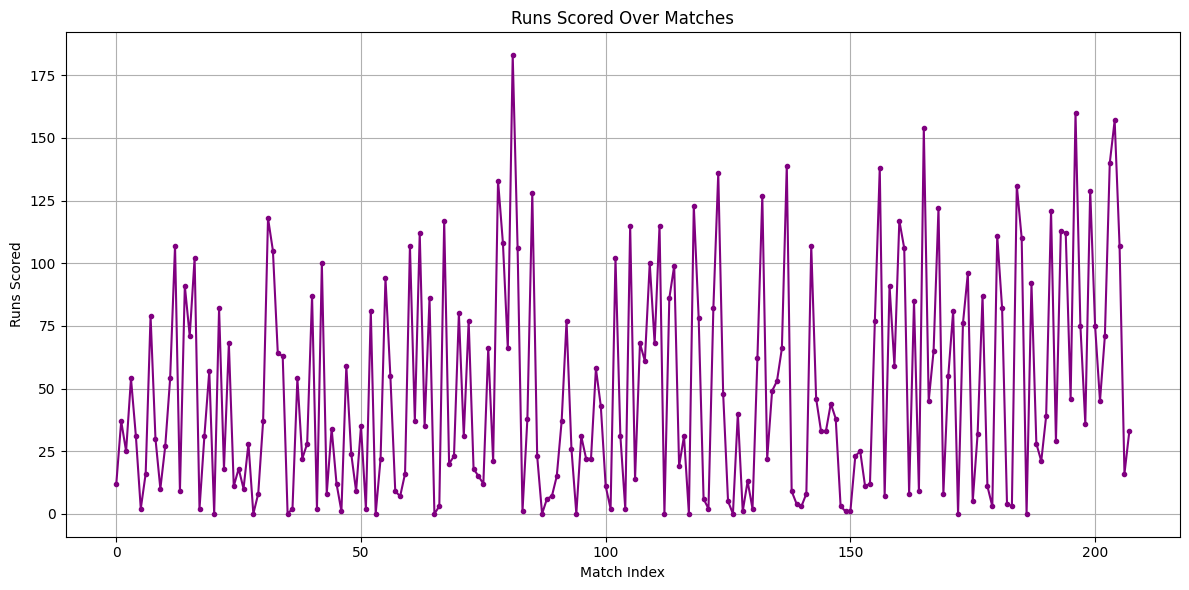

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['RunsScored'], marker='.', color='purple')
plt.title('Runs Scored Over Matches')
plt.xlabel('Match Index')
plt.ylabel('Runs Scored')
plt.grid(True)
plt.tight_layout()
plt.show()

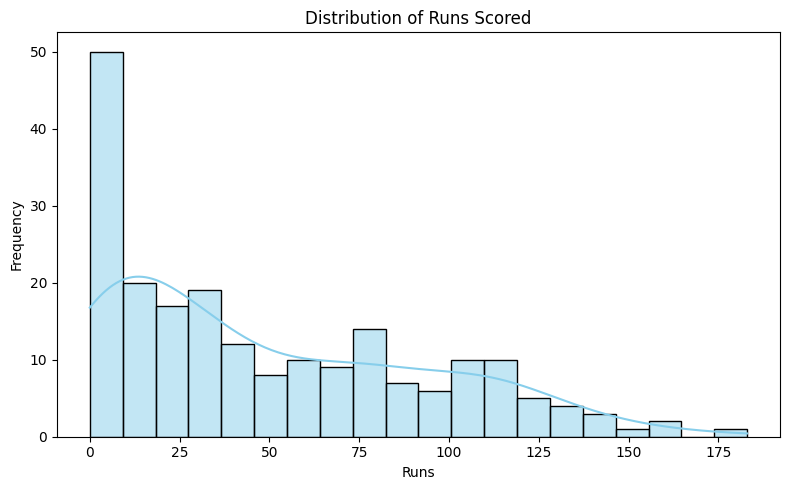

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(data['RunsScored'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\shash\AppData\Local\Temp\ipykernel_21544\745476996.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['RunsScored'], shade=True, color='red')


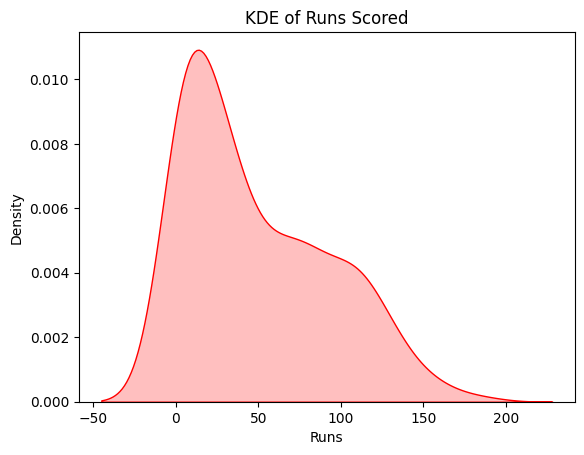

In [44]:
sns.kdeplot(data['RunsScored'], shade=True, color='red')
plt.title('KDE of Runs Scored')
plt.xlabel('Runs')
plt.show()